In [1]:
#!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
import pandas as pd
import numpy as np
import talib as ta
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.signal import argrelextrema
import json
from bs4 import BeautifulSoup
import requests 
import urllib.request
import datetime
from datetime import timedelta, datetime
import time
diretorio= os.getcwd()
diretorio

'/Users/igoracmorais/igor/Wise&Trust/CPM_trading2/Trading/Rotines/Python'

In [2]:
data=pd.read_csv(diretorio+"/btc.csv",sep=";",index_col="datetime")

In [3]:
def mom(data,time=[]):
    for i in time:
        data["mom_"+str(i)]=ta.MOM(data.close,timeperiod=i)
    return data

In [4]:
# Candlestick graph
def candle_graph_mom(data,nome_coluna_datas="datetime",n=200):
    ohlc=data.reset_index()[-n:]
    ohlc[nome_coluna_datas]=pd.to_datetime(ohlc[nome_coluna_datas])
    ohlc[nome_coluna_datas]=ohlc[nome_coluna_datas].apply(mdates.date2num)
    #
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(6,8)) 
    ax1 = plt.subplot2grid((6,1), (0, 0),rowspan=3)
    ax2 = plt.subplot2grid((6,1), (3, 0),rowspan=2)
    ax1.axes.get_xaxis().set_visible(False)
    candlestick_ohlc(ax1, ohlc.values, width=.6, colorup='green', colordown='red')
    #
    ax2.plot(ohlc[nome_coluna_datas], ohlc["mom_5"], color = 'green', lw=1,label="mom_5")
    ax2.plot(ohlc[nome_coluna_datas], ohlc["mom_15"], color = 'blue', lw=1,label="mom_15")
    ax2.plot(ohlc[nome_coluna_datas], ohlc["mom_20"], color = 'black', lw=1,label="mom_20")
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    import matplotlib.ticker as ticker
    ax2.xaxis.set_major_locator(ticker.MaxNLocator(10))
    plt.xticks(fontsize=8)
    ax1.legend(label="closed")
    ax2.legend(loc=1,fontsize=8)
    return plt.show()

In [5]:
def turning_point(data,coluna=[],ordem=3):
    for coluna in coluna:
        data[coluna+'_min'] = data.iloc[argrelextrema(data[coluna].values, 
                                                  np.less_equal, order=ordem)[0]][coluna]
        data[coluna+'_max'] = data.iloc[argrelextrema(data[coluna].values, 
                                                  np.greater_equal, order=ordem)[0]][coluna]
        data[coluna+'_min'].fillna(0,inplace=True)
        data[coluna+'_max'].fillna(0,inplace=True)
        data["tp_"+coluna]=0
        data.loc[data[coluna+'_min']>0,"tp_"+coluna]=1
        data.loc[data[coluna+'_max']>0,"tp_"+coluna]=-1
        data[[coluna+'_min',coluna+'_max']]=np.nan
        data.drop([coluna+'_min',coluna+'_max'],axis=1,inplace=True)
    return data

In [13]:
# função genérica para plotar um grafico de sinais.
# coluna1 = serie onde plotar os sinais
# coluna2 = serie onde estao os turning points
def graph_signal(data,coluna1,coluna2):
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(6,8)) 
    ax1 = plt.subplot2grid((6,1), (0, 0),rowspan=3)
    x_axis = data.index.get_level_values(0)
    ema1,=ax1.plot(x_axis, data[coluna1],color='black', lw=1)
    ax1.axes.get_xaxis().set_visible(False)
    # signals turning points
    v_pr=data.loc[data[coluna2]<0]
    c_pr=data.loc[data[coluna2]>0]
    ax1.plot(v_pr.index, data.loc[v_pr.index][coluna1], 'v', markersize=6, color='r')
    ax1.plot(c_pr.index, data.loc[c_pr.index][coluna1], '^', markersize=6, color='b')
    # signal trend
    data["tp_"+coluna2]=0
    data.loc[data[coluna2]>0,"tp_"+coluna2]=1
    data.loc[data[coluna2]>0,"tp_"+coluna2]=-1
    return plt.show()

## Exemplo

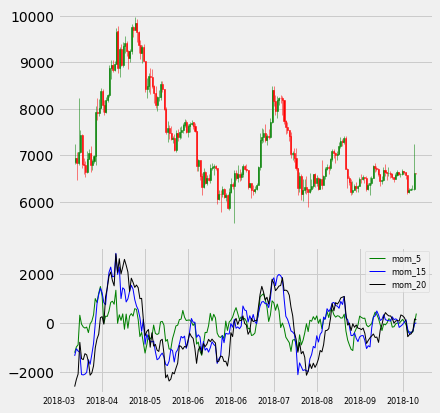

In [41]:
df=mom(data,time=[5,15,20,40,60])
candle_graph_mom(df)

In [42]:
df=turning_point(df,coluna=["close","mom_5","mom_15","mom_20","mom_40","mom_60"])
df

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:68: RuntimeWarning: invalid value encountered in less_equal
  results &= comparator(main, plus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:69: RuntimeWarning: invalid value encountered in less_equal
  results &= comparator(main, minus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:68: RuntimeWarning: invalid value encountered in greater_equal
  results &= comparator(main, plus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:69: RuntimeWarning: invalid value encountered in greater_equal
  results &= comparator(main, minus)


,open,high,low,close,volume,mom_5,mom_15,mom_20,tp_close,tp_mom_5,tp_mom_15,tp_mom_20,mom_40,tp_mom_40,mom_60,tp_mom_60
datetime,,,,,,,,,,,,,,,,
2013-04-25,154.20,162.00,120.09,141.71,2.684789e+07,NaN,NaN,NaN,-1,0,0,0,NaN,0,NaN,0
2013-04-26,141.71,144.99,121.45,136.90,1.706132e+07,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,0
2013-04-27,136.90,139.88,122.71,128.00,7.855444e+06,NaN,NaN,NaN,1,0,0,0,NaN,0,NaN,0
2013-04-28,128.00,136.68,127.50,134.44,3.665400e+06,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,0
2013-04-29,134.44,149.08,133.00,144.00,9.987126e+06,NaN,NaN,NaN,-1,0,0,0,NaN,0,NaN,0
2013-04-30,144.00,146.93,134.00,139.23,9.124397e+06,-2.48,NaN,NaN,0,0,0,0,NaN,0,NaN,0
2013-05-01,139.23,140.06,104.00,116.38,2.179098e+07,-20.52,NaN,NaN,0,0,0,0,NaN,0,NaN,0
2013-05-02,116.38,126.90,91.11,106.25,2.493732e+07,-21.75,NaN,NaN,0,0,0,0,NaN,0,NaN,0
2013-05-03,106.25,109.00,79.00,98.10,2.250289e+07,-36.34,NaN,NaN,1,0,0,0,NaN,0,NaN,0


/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


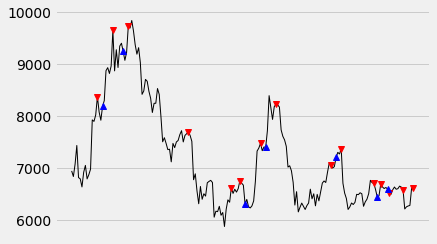

In [18]:
graph_signal(df[-200:],coluna='tp_mom_15')